In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import h5py
from lr_utils import load_dataset
from PIL import Image
from scipy import ndimage

## Loading dataset from lr_utils .h5 data type

In [3]:
x_train,y_train,x_test,y_test,classes=load_dataset()

In [4]:
print(type(x_train))

<class 'numpy.ndarray'>


In [5]:
print((classes))

[b'non-cat' b'cat']


In [6]:
print(x_train.shape)

(209, 64, 64, 3)


In [7]:
print(x_test.shape)

(50, 64, 64, 3)


In [8]:
print(y_train.shape)

(1, 209)


In [9]:
print(y_test.shape)
print(y_train[0])

(1, 50)
[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [10]:
img=(x_train[7])

In [11]:
print("Its a ",classes[np.squeeze(y_train[:,7])].decode("utf-8")," picture")

Its a  cat  picture


Its a cat picture


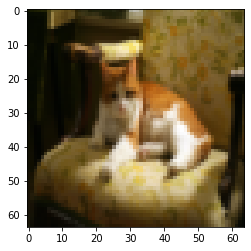

In [12]:
#Or
result=(y_train[0][7])
if(result==1):
    print('Its a cat picture')
else:
    print('Its not a cat picture')
plt.imshow(img)

In [13]:
print(type(classes))

<class 'numpy.ndarray'>


In [14]:
print((classes[0]))

b'non-cat'


### Reshaping dataset from 4d (209,64,64,3) to 2d(12288,209)

In [15]:
x_train_flatten=x_train.reshape(x_train.shape[0],-1).T
x_test_flatten=x_test.reshape(x_test.shape[0],-1).T

In [16]:
print('After flattening the shape of X_trian: ',x_train_flatten.shape)
print('After flattening the shape fo x_test : ',x_test_flatten.shape)

After flattening the shape of X_trian:  (12288, 209)
After flattening the shape fo x_test :  (12288, 50)


In [17]:
print(len(x_train_flatten[0]))
ks=(x_train_flatten.T)
print((ks[1]))

209
[196 192 190 ...  82  80  81]


## Standardization of dataset

In [18]:
x_train_standard=x_train_flatten/255.0
x_test_standard=x_test_flatten/255.0

In [19]:
x_train_standard[1]

array([0.12156863, 0.75294118, 0.27843137, 0.08627451, 0.03529412,
       0.30980392, 0.22352941, 0.08627451, 0.26666667, 0.18431373,
       0.70588235, 0.02352941, 0.6       , 0.0627451 , 0.29411765,
       0.76078431, 0.99607843, 0.85490196, 0.78431373, 0.00784314,
       0.09019608, 0.25098039, 0.69803922, 0.75686275, 0.40784314,
       0.05882353, 0.45490196, 0.14117647, 0.09803922, 0.70980392,
       0.11372549, 0.74509804, 0.91764706, 0.40784314, 0.62352941,
       0.13333333, 0.15294118, 0.6745098 , 0.11764706, 0.40784314,
       0.65098039, 0.02352941, 0.12941176, 1.        , 0.41176471,
       0.        , 0.23529412, 0.18823529, 0.15294118, 0.15294118,
       0.65882353, 0.56078431, 0.3254902 , 0.1254902 , 0.04705882,
       1.        , 0.12156863, 0.53333333, 0.28235294, 0.16862745,
       0.25882353, 0.46666667, 0.50196078, 0.50196078, 0.16862745,
       0.37647059, 0.90588235, 0.27058824, 0.5254902 , 0.42745098,
       0.0627451 , 0.01960784, 0.03529412, 0.32941176, 0.4    

In [20]:
def sigmoid (z):
    return 1/(1+np.exp(-z))

In [21]:
sigmoid(np.array([0,3]))

array([0.5       , 0.95257413])

## Initializing the parameters

In [22]:
def initilizing_par(dim):
    w=np.zeros((dim,1),dtype=float)
    b=0
    print(w.shape)
    assert w.shape==(dim,1)
    assert (isinstance(b,float) or isinstance(b,int))
    return w,b

In [23]:
d=2
w,b=initilizing_par(d)
print(w)
print(b)

(2, 1)
[[0.]
 [0.]]
0


In [47]:
def propagate(w,b,X,Y):
    m=X.shape[1]                                   # compute activation
    #print('m or dim : ',m)
    A=sigmoid(np.dot(w.T,X)+b)
    #print('A:',A)
    cost=(-1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))
    dw_=(1/m)*(np.dot(X,(A-Y).T))
    db_=(1/m)*np.sum(A-Y)
    #print('dw.shape: ',dw_.shape)
    #print('w.shape:',w.shape)
    #print('dw : ',dw_)
    assert(dw_.shape==w.shape)
    assert(db_.dtype==float)
    cost=np.squeeze(cost)
    assert(cost.shape==())
    grad={"dw":dw_,"db":db_}
    return grad,cost
    

In [48]:


w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
x_=(np.dot(w.T,X)+b)
print(x_)
print(sigmoid(x_))
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

[[ 9.  12.  -5.4]]
[[0.99987661 0.99999386 0.00449627]]
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


## Optimization : Gradient Descent

In [51]:

def optimize(w,b,X,Y,num_ephochs,learning_rate):
    costs=[]
    for i in range(num_ephochs):
        grads,cost=propagate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
    
        #update rule
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        #save cost at each 100 iteration
        if i %100 ==0:
            costs.append(cost)
            print('After %d iteration cost is : %f'%(i,cost))
    params={"w":w,"b":b}
    grads={"dw":dw,"db":db}
    return params,grads,costs


In [55]:

params,grads, costs= optimize(w, b, X, Y, num_ephochs= 1000, learning_rate = 0.009)

print ("w = " + str(params['w']))
print ("b = " + str(params['b']))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


After 0 iteration cost is : 5.801545
After 100 iteration cost is : 1.055933
After 200 iteration cost is : 0.378303
After 300 iteration cost is : 0.363595
After 400 iteration cost is : 0.356242
After 500 iteration cost is : 0.349210
After 600 iteration cost is : 0.342420
After 700 iteration cost is : 0.335860
After 800 iteration cost is : 0.329517
After 900 iteration cost is : 0.323380
w = [[-0.64226437]
 [-0.43498153]]
b = 2.2025594747904087
dw = [[ 0.06282959]
 [-0.01416124]]
db = -0.04847508604218077


In [61]:
def predict(w,b,X):
    m=X.shape[1]
    y_pred=np.zeros((1,m),dtype=float)
    #w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    w=w.reshape(X.shape[0],1)
    A=sigmoid(np.dot(w.T,X)+b)
    print(A.shape)
    for i in range (A.shape[1]):
        if A[0,i]>0.5:
            y_pred[0,i]=1
        else:
            y_pred[0,i]=0
        
    assert(y_pred.shape==(1,m))
    return y_pred

In [62]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

(1, 3)
predictions = [[1. 1. 0.]]


In [64]:
print(x_train.shape)

(209, 64, 64, 3)


In [80]:
## Creating model pipline
def model(X_train,Y_train,X_test,Y_test,ephochs=1000,learning_rate=0.09):
    w,b=initilizing_par(X_train.shape[0])
    params,grads,costs=optimize(w,b,X_train,Y_train,ephochs,learning_rate)
    w=params['w']
    b=params['b']
    
    Y_pred_train=predict(w,b,X_train)
    Y_pred_test=predict(w,b,X_test)
    
    train_accuracy=(100-(np.mean(np.abs(Y_pred_train-Y_train)*100)))
    test_accuracy=(100-(np.mean(np.abs(Y_pred_test-Y_test)*100)))
    print("Train Accuracy : {}%".format(train_accuracy))
    print("Test Accuracy : {}%".format(test_accuracy))
    d={"w":w,"b":b,"costs":costs,"Y_prediction_train": Y_pred_train,"Y_prediction_test":Y_pred_test,"learning_rate":learning_rate,"ephochs":ephochs}
    return d

In [81]:
d=model(x_train_standard,y_train,x_test_standard,y_test,ephochs=2000,learning_rate=0.005)

(12288, 1)
After 0 iteration cost is : 0.693147
After 100 iteration cost is : 0.584508
After 200 iteration cost is : 0.466949
After 300 iteration cost is : 0.376007
After 400 iteration cost is : 0.331463
After 500 iteration cost is : 0.303273
After 600 iteration cost is : 0.279880
After 700 iteration cost is : 0.260042
After 800 iteration cost is : 0.242941
After 900 iteration cost is : 0.228004
After 1000 iteration cost is : 0.214820
After 1100 iteration cost is : 0.203078
After 1200 iteration cost is : 0.192544
After 1300 iteration cost is : 0.183033
After 1400 iteration cost is : 0.174399
After 1500 iteration cost is : 0.166521
After 1600 iteration cost is : 0.159305
After 1700 iteration cost is : 0.152667
After 1800 iteration cost is : 0.146542
After 1900 iteration cost is : 0.140872
(1, 209)
(1, 50)
Train Accuracy : 99.04306220095694%
Test Accuracy : 70.0%


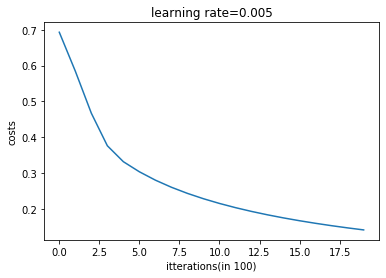

In [88]:
costs=(np.squeeze(d['costs']))
plt.plot(costs)
plt.xlabel('itterations(in 100)')
plt.ylabel('costs')
plt.title('learning rate={}'.format(d['learning_rate']))
plt.show()

In [102]:
learn_rates=np.array([0.01,0.001,0.0001])
model_costs=list(np.zeros(learn_rates.shape))
for i in range(learn_rates.shape[0]):
    model_d=model(x_train_standard,y_train,x_test_standard,y_test,ephochs=1000,learning_rate=learn_rates[i])
    model_costs[i]=np.array([model_d['costs']])
    

(12288, 1)
After 0 iteration cost is : 0.693147
After 100 iteration cost is : 0.823921
After 200 iteration cost is : 0.418944
After 300 iteration cost is : 0.617350
After 400 iteration cost is : 0.522116
After 500 iteration cost is : 0.387709
After 600 iteration cost is : 0.236254
After 700 iteration cost is : 0.154222
After 800 iteration cost is : 0.135328
After 900 iteration cost is : 0.124971
(1, 209)
(1, 50)
Train Accuracy : 98.56459330143541%
Test Accuracy : 70.0%
(12288, 1)
After 0 iteration cost is : 0.693147
After 100 iteration cost is : 0.591289
After 200 iteration cost is : 0.555796
After 300 iteration cost is : 0.528977
After 400 iteration cost is : 0.506881
After 500 iteration cost is : 0.487880
After 600 iteration cost is : 0.471108
After 700 iteration cost is : 0.456046
After 800 iteration cost is : 0.442350
After 900 iteration cost is : 0.429782
(1, 209)
(1, 50)
Train Accuracy : 86.60287081339713%
Test Accuracy : 62.0%
(12288, 1)
After 0 iteration cost is : 0.693147
Afte

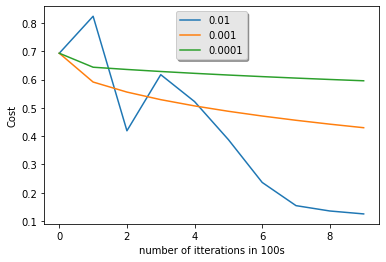

In [117]:
for i in range(learn_rates.shape[0]):
    plt.plot(model_costs[i][0],label="{}".format(learn_rates[i]))
    #plt.legend('{}'.format(learn_rates[i]))
plt.xlabel('number of itterations in 100s')
plt.ylabel('Cost')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()